**2023-01-09 `05-Data-Visualization - Day 3 - Introduction to Statistics`**

Matplotlib day 2 allowed us to create our basic charts using Pandas!

It was a great way to practice our data engineering skills as well as our visualization skills.

Day 3 is a little different, it is mostly going to be about statistics and how to calculate them with python, we will still have some visualizations, but it's mostly about the stats!

---

**Objectives**

* Calculate summary statistics such as mean, median, mode, variance and standard deviation using Python.
* Plot, characterize, and quantify a normally distributed dataset using Python.
* Qualitatively and quantitatively identify potential outliers in a dataset.
* Differentiate between a sample and a population in regards to a dataset.
* Define and quantify correlation between two factors.
* Calculate and plot a linear regression in Python.

**Resources**
* [Intro to Statistics](https://rice.bootcampcontent.com/Rice-Coding-Bootcamp/rice-hou-data-pt-07-2021-u-c/-/blob/master/01-Lesson-Plans/05-Matplotlib/3/Supplemental/Intro%20to%20Statistics.pdf)
* [ASA - P-Value Statement](https://rice.bootcampcontent.com/Rice-Coding-Bootcamp/rice-hou-data-pt-07-2021-u-c/-/blob/master/01-Lesson-Plans/05-Matplotlib/3/Supplemental/ASA%20-%20P-ValueStatement.pdf)


**Presentation**
* [Introduction to Statistics](https://ucb.bootcampcontent.com/UCB-Coding-Bootcamp/UCB-VIRT-DATA-PT-11-2022-U-LOLC/-/blob/main/slides/Data-05.3_Introduction_to_Statistics.pdf)

**Install in your `Git Bash` (Win) or `Terminal` (Mac)**
```
python -m pip install -U sklearn
```

In [1]:
# !python -m pip install -U sklearn scipy

# ==========================================

### 3.01 Instructor Do: Summary Statistics in Python (10 min)

The most common **measures of central tendency** are the **mean**, **median** and **mode**.

  * The **mean** of a dataset is what is known as the arithmetic average of a dataset. It is calculated from the sum all of the numbers divided by the number of elements in a dataset.

  * The **median** of a dataset is the middle element. It is calculated from listing the data numerically and selecting the middle element. For even-length datasets, the average of the 2 center elements is the median of the dataset.

  * The **mode** of a dataset is the most frequently occurring element. The mode can be used for either numeric or categorical data.

![Categorical Mode](../Images/catagorical_mode.png)

Two packages to remember when calculating statistics are **[NumPy](https://numpy.org/)** and **[SciPy](https://www.scipy.org/)**.
* **Mean** is calculated using **NumPy**.
* **Median** is calculated using **NumPy**.
* **Mode** is calculated using **SciPy**.

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [3]:
# Read in the LAX temperature data
temperature_df = pd.read_csv('01-Ins_Summary_Statistics/Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']
temperatures

0       52
1       51
2       52
3       49
4       43
        ..
3524    60
3525    59
3526    58
3527    58
3528    58
Name: HourlyDryBulbTemperature, Length: 3529, dtype: int64

The reason we need to use both **NumPy** and **SciPy** modules to calculate the **measures of central tendency** is that `mode` is not a function in **NumPy**. This is likely because **NumPy** is a very lightweight module and calculating the `mode` can be computationally intensive.

In [4]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(temperatures)
print(f"The mean temperature at the LAX airport is {mean_numpy}")

median_numpy = np.median(temperatures)
print(f"The median temperature at the LAX airport is {median_numpy}")

mode_scipy = sts.mode(temperatures)
print(f"The mode temperature at the LAX airport is {mode_scipy}")

The mean temperature at the LAX airport is 57.65514310002834
The median temperature at the LAX airport is 57.0
The mode temperature at the LAX airport is ModeResult(mode=array([57], dtype=int64), count=array([327]))


**Why Plot Data?**
* To determine if the data is normally distributed.
* To determine if the data is multimodal.
* To characterize clusters in the dataset.

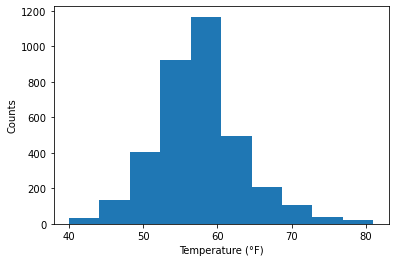

In [5]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(temperatures)
plt.xlabel('Temperature (°F)')
plt.ylabel('Counts')
plt.show()

***What Is Normally Distributed Data?***
* Measurements in a dataset are obtained independent of one another.
* The distribution of data follows a bell curve shape.
![normal-distribution](../Images/normal-distribution-1.png)
* We can quantitatively test if a dataset is normal using **scipy.stats.normaltest()**

In [6]:
sample = temperatures.sample(50)
print(sts.normaltest(sample))
sts.normaltest(temperatures.sample(50))

NormaltestResult(statistic=1.3866868738945053, pvalue=0.4999018814348589)


NormaltestResult(statistic=1.1870213273950991, pvalue=0.5523846400407487)

**What are variance and standard deviation?**
* ***Variance*** is the measurement of how far each value is away from the mean of the dataset.
* ***Standard deviation*** is the square root of variance.
* In Python, both `variance` and `standard deviation` are calculated using the NumPy module.

In [7]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(temperatures)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(temperatures,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 32.33077618382964
The population standard deviation using the NumPy module is 5.686015844493369


When we have a dataset that is normally distributed, we can use the **68-95-99.7** rule to characterize the data.
* The **68-95-99.7** rule states that roughly **68%** of all values in normally distributed data fall within one standard deviation of the mean (in either direction). Additionally, **95%** of the values fall within two standard deviations, and **99.7%** of the values fall within three standard deviations.

![68-95-99.7 Rule](../Images/68-95-99.7_rule.jpg)

In [8]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Roughly 68% of the data is between 51.969 and 63.341
Roughly 95% of the data is between 46.283 and 69.027
Roughly 99.7% of the data is between 40.597 and 74.713


**What is a Z-Score?**
* a **z-score** (also called a standard score) gives you an idea of how far from the **mean** a data point is. But more technically it’s a measure of how many **standard deviations** `below` or `above` the population mean a raw score is. 

* To calculate a **z-score** in Python, we must use the `scipy.stats.zscore` function.

In [9]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = sts.zscore(temperatures)
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are 0      -0.994570
1      -1.170440
2      -0.994570
3      -1.522181
4      -2.577401
          ...   
3524    0.412390
3525    0.236520
3526    0.060650
3527    0.060650
3528    0.060650
Name: HourlyDryBulbTemperature, Length: 3529, dtype: float64


# ==========================================

### 3.02 Instructor Do: Quantiles and Outliers in Python (10 min)

**What are quantiles, quartiles, and outliers?**
* **[Quantiles](https://en.wikipedia.org/wiki/Quantile)** divide data into well-defined regions based on a sorted dataset.
* **[Quartiles](https://en.wikipedia.org/wiki/Quartile)** are a specific type of quantile where a sorted dataset is split into four equal parts.
  * Q1: 25% of the data
  * Q2: 50% of the data
  * Q3: 75% of the data
![quartiles](../Images/Quartile_02.png)
* **[Outliers](https://www.mathsisfun.com/data/outliers.html)** are an extreme value in a dataset that can skew calculations and results.


In [10]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**How to Identify Potential Outliers?**
* **Qualitatively** Use box and whisker plots to visually identify potential outlier data points.
![outlier_boxplot_annot.png](../Images/outlier_boxplot_annot.png)
* **Quantitatively** Determine the outlier boundaries in a dataset using the **1.5  IQR** rule.
  * `IQR` is the interquartile range, or the range between the 1st and 3rd quartiles.
  * Anything **below** `Q1 – 1.5  IQR` could be an outlier.
  * Anything **above** `Q3 + 1.5  IQR` could be an outlier.


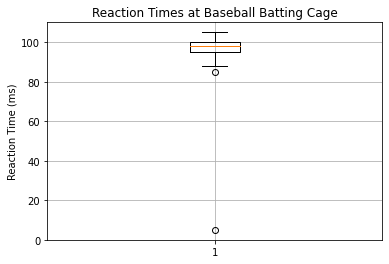

In [11]:
# Example outlier plot of reaction times
times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
# ax1.boxplot(times, showmeans=True)
ax1.boxplot(times)
plt.grid()
plt.show()

In [12]:
# We need to sort the data to determine which could be outliers
times.sort()
print(len(times), times)

13 [5, 85, 88, 95, 96, 97, 98, 98, 100, 100, 101, 102, 105]


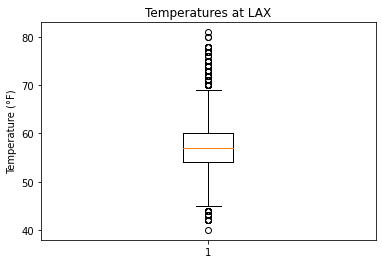

In [13]:
# The second example again looks at the LAX temperature data set and computes quantiles
temperature_df = pd.read_csv('02-Ins_Quartiles_and_Outliers/Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()

**How to Identify Potential Outliers in Python?**
* **Qualitatively** Use Matplotlib’s pyplot.boxplot function to plot the box and whisker.
* **Quantitatively**
  * Use Pandas series.quantile function to calculate the quantile.
  * Calculate the outlier boundaries.

In [14]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
iqr_1_5 = iqr * 1.5

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The interquartile * 1.5 range of temperatures is: {iqr_1_5}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - iqr_1_5
upper_bound = upperq + iqr_1_5
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 54.0
The upper quartile of temperatures is: 60.0
The interquartile range of temperatures is: 6.0
The interquartile * 1.5 range of temperatures is: 9.0
The the median of temperatures is: 57.0 
Values below 45.0 could be outliers.
Values above 69.0 could be outliers.


# ==========================================

### 3.03 Student Do: Summary Statistics in Python (15 min)

## Instructions

* Using Pandas, import the California housing dataset from the Resources folder.

* Determine the most appropriate measure of central tendency to describe the population. Calculate this value.

* Use both data visualization and a quantitative measurement to find whether the age of houses in California is considered normally distributed.

* Inspect the average occupancy of housing in California and determine if there are any potential outliers in the dataset.

  * **Hint**: This dataset is very large.

* If there are potential outliers in the average occupancy, find the minimum and maximum of the median housing prices across the outliers.

## Bonus

Plot the latitude and longitude of the California housing data using Matplotlib and color the data points using the median income of the block. Does any location seem to be an outlier?

In [15]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [16]:
# Read in the california housing data set
data_file = '03-Stu_Summary_Stats_Python/Resources/California_Housing.csv'
california_data = pd.read_csv(data_file)
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


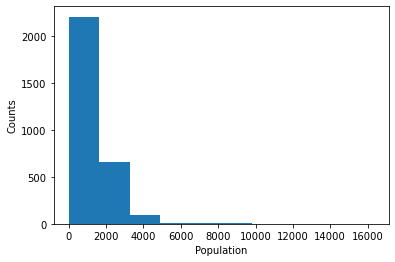

1387.9633333333334
1152.5
0    1128.0
dtype: float64


In [17]:
# Determine which measure of central tendency is most appropriate to describe the Population
plt.hist(california_data['Population'])
plt.xlabel('Population')
plt.ylabel('Counts')
plt.show()
print(california_data['Population'].mean())
print(california_data['Population'].median())
print(california_data['Population'].mode())

In [18]:
len(california_data["HouseAge"])

3000

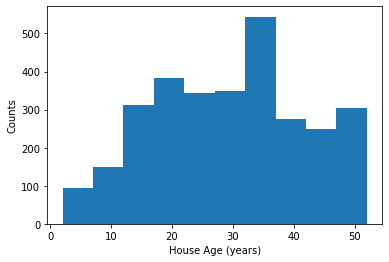

NormaltestResult(statistic=8.864740657842072, pvalue=0.011886281857446139)
29.108666666666668
30.0
0    52.0
dtype: float64


In [19]:
# Determine if the house age in California is normally distributed
plt.hist(california_data['HouseAge'])
plt.xlabel('House Age (years)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(california_data["HouseAge"].sample(100)))
print(california_data['HouseAge'].mean())
print(california_data['HouseAge'].median())
print(california_data['HouseAge'].mode())

In [20]:
# Determine if there are any potential outliers in the average occupancy in California
quartiles = california_data['AveOccup'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
# len(outlier_occupancy)

The lower quartile of occupancy is: 2.4250909806040477
The upper quartile of occupancy is: 3.297459274342836
The interquartile range of occupancy is: 0.8723682937387882
The the median of occupancy is: 2.81970199317512 
Values below 1.1165385399958654 could be outliers.
Values above 4.606011714951018 could be outliers.


In [21]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
print(f"The minimum median income of the potential outliers is {outlier_occupancy['MedInc'].min()}")
print(f"The maximum median income of the potential outliers is {outlier_occupancy['MedInc'].max()}")

The minimum median income of the potential outliers is 0.716
The maximum median income of the potential outliers is 15.0001


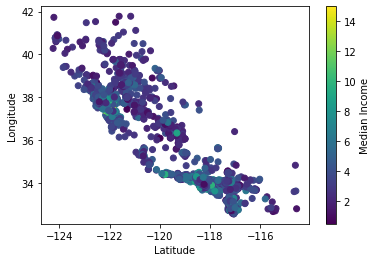

In [22]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.
plt.scatter(california_data['Longitude']
            ,california_data['Latitude']
            ,c=california_data['MedInc'])
clb = plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
clb.set_label("Median Income")
plt.show()

# ==========================================

### 3.04 Instructor Do: Sample, Population, and SEM (10 min)

**Population Dataset vs. Sample Dataset**
* **Population Dataset**
  * Dataset containing all possible elements of an experiment or study.
  * In statistics, `population` does not mean `people`.
  * Any `complete set` of data is a `population dataset`.

* **Sample Dataset**
  * A `subset` of `population dataset`.
  * A `sample dataset` can be selected **randomly** from the `population dataset` or selected with **bias**.


To estimate how well a sample is representative of the total **population**, we calculate the **standard error** (**standard error of the mean**, or **SEM**) of the **sample**.
* [scipy.stats.sem](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html)
The **standard error of the mean (SEM)** can be expressed as:

![Standard_error_formula.png](Images/Standard_error_formula.png#left)

* **σ** is the **standard deviation** of the population.
* **n** is the **size** (number of observations) of the sample.

In [23]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
# import standard error of the mean (sem)
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(42)

In [24]:
# Sample versus population example fuel economy
fuel_economy = pd.read_csv('04-Ins_Standard_Error/Resources/2019_fuel_economy.csv')

# First overview the data set - how many factors, etc.
fuel_economy.head()

,Type,Combined_MPG,Make_Model
0,Two Seaters,21.0000,Acura_NSX
1,Two Seaters,27.9406,ALFA ROMEO_4C
2,Two Seaters,20.9455,Aston Martin Lagonda Ltd_Vantage V8
3,Two Seaters,25.9952,Audi_TT Roadster quattro
4,Two Seaters,27.6300,BMW_Z4 sDrive30i


The mean MPG of all vehicles is: 23.33
The standard deviation of all vehicle's MPG is: 5.94


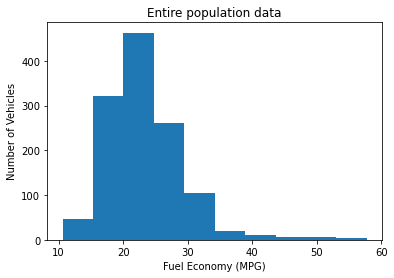

In [25]:
# Calculate the summary statistics and plot the histogram of the entire population data
print(f"The mean MPG of all vehicles is: {round(fuel_economy.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(fuel_economy.Combined_MPG.std(),2)}")
plt.hist(fuel_economy.Combined_MPG)
plt.title("Entire population data")
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is: 18.48
The standard deviation of all vehicle's MPG is: 2.41


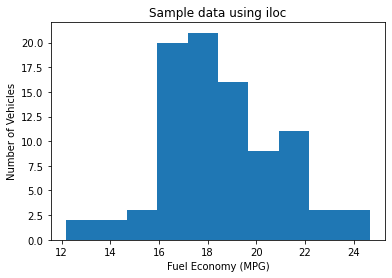

In [26]:
# Calculate the summary statistics and plot the histogram of the sample data using iloc
subset = fuel_economy.iloc[range(766,856)]
print(f"The mean MPG of all vehicles is: {round(subset.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset.Combined_MPG.std(),2)}")
plt.hist(subset.Combined_MPG)
plt.title("Sample data using iloc")
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is: 24.19
The standard deviation of all vehicle's MPG is: 6.87


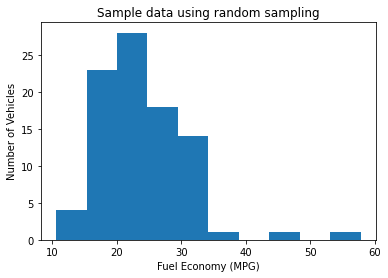

In [27]:
# Calculate the summary statistics and plot the histogram of the sample data using random sampling
subset = fuel_economy.sample(90)
print(f"The mean MPG of all vehicles is: {round(subset.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset.Combined_MPG.std(),2)}")
plt.hist(subset.Combined_MPG)
plt.title("Sample data using random sampling")
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

In [28]:
# Generate a new 30 vehicle sample and calculate the SEM of the sample
sample = fuel_economy.sample(300)
print(f"The SEM value for the sample fuel economy data is {sem(sample.Combined_MPG)}")

The SEM value for the sample fuel economy data is 0.35182615645544996


In [29]:
l = [fuel_economy.sample(30) for x in range(0,10)]
vehicle_sample_30 = pd.concat(l)
print(len(vehicle_sample_30))
print("SEM: ", sem(vehicle_sample_30.Combined_MPG))
display(vehicle_sample_30.head())

300
SEM:  0.33060848269777443


,Type,Combined_MPG,Make_Model
1239,Standard SUV 4WD,19.2827,Volkswagen_Atlas 4Motion
989,Small SUV 4WD,24.6169,BMW_X3 xDrive30i
751,Small Pick-up Trucks 4WD,16.6991,Chevrolet_COLORADO ZR2 4WD
1099,Small SUV 4WD,28.6751,Subaru_FORESTER AWD
1204,Standard SUV 4WD,14.8782,LEXUS_LX 570


standard_errors [0.33060848269777443]


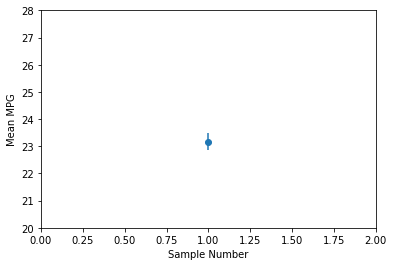

In [30]:
# Generate the plot data for each sample 
means = [vehicle_sample_30.Combined_MPG.mean()]
standard_errors = [sem(vehicle_sample_30.Combined_MPG)]
x_axis = np.arange(0, 1, 1) + 1
print("standard_errors", standard_errors)
# Setting up the plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, 1 + 1)
ax.set_ylim(20,28)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean MPG")
plt.show()

In [31]:
# Create a sample set of 10, each with 30 vehicles
vehicle_sample_set = [fuel_economy.sample(30) for x in range(0,10)]

In [32]:
len(vehicle_sample_set)

10

In [33]:
l = []
for x in vehicle_sample_set:
    l = l + [sample for sample in x]

In [34]:
len(l)

30

In [35]:
# Generate the plot data for each sample 
means = [sample.Combined_MPG.mean() for sample in vehicle_sample_set]
standard_errors = [sem(sample.Combined_MPG) for sample in vehicle_sample_set]
x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

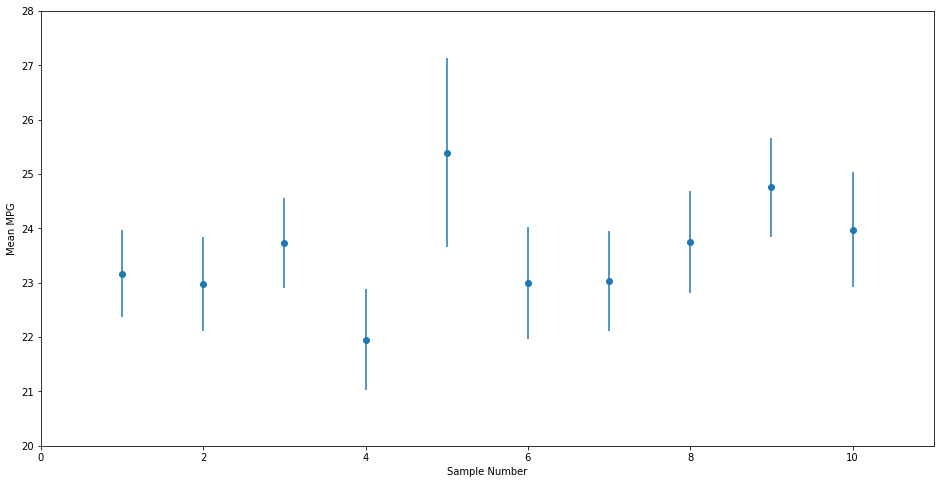

In [36]:
# Setting up the plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(vehicle_sample_set) + 1)
ax.set_ylim(20,28)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean MPG")
plt.show()

# ==========================================

### 3.05 Student Do: SEM and Error Bars (10 min)

## Instructions

Work with a partner on this activity. Be sure to compare your calculated values as you progress through the activity.

* Execute the starter code to import the Boston housing data set from scikit-learn.
* Create a sample set of median housing prices using Pandas. Be sure to create samples of size 20.
* Calculate the means and standard errors for each sample.
* Create a plot displaying the means for each sample, with the standard error as error bars.
* Calculate the range of SEM values across the sample set.
* Determine which sample has the lowest standard error value.
* Compare this sample's mean to the population's mean.
* Rerun your sampling code a few times to generate new sample sets. Try changing the sample size and rerunning the sampling code.
* Discuss with your partner what changes you observe when sample size changes.

In [37]:
%matplotlib notebook

In [38]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from scipy.stats import sem

In [39]:
# Import the Boston housing data set and get description
boston_dataset = load_boston()

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [40]:
# Read Boston housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)
housing_data['MEDV'] = boston_dataset.target
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 20
samples = [housing_data.sample(div) for x in range(0,nsamples)]

In [42]:
samples = []
for x in range(0,nsamples):
    samples.append(housing_data.sample(div))

In [43]:
# Calculate means
means = [tara.MEDV.mean() for tara in samples]
# Calculate standard error on means
sems = [sem(s.MEDV) for s in samples]

<IPython.core.display.Javascript object>


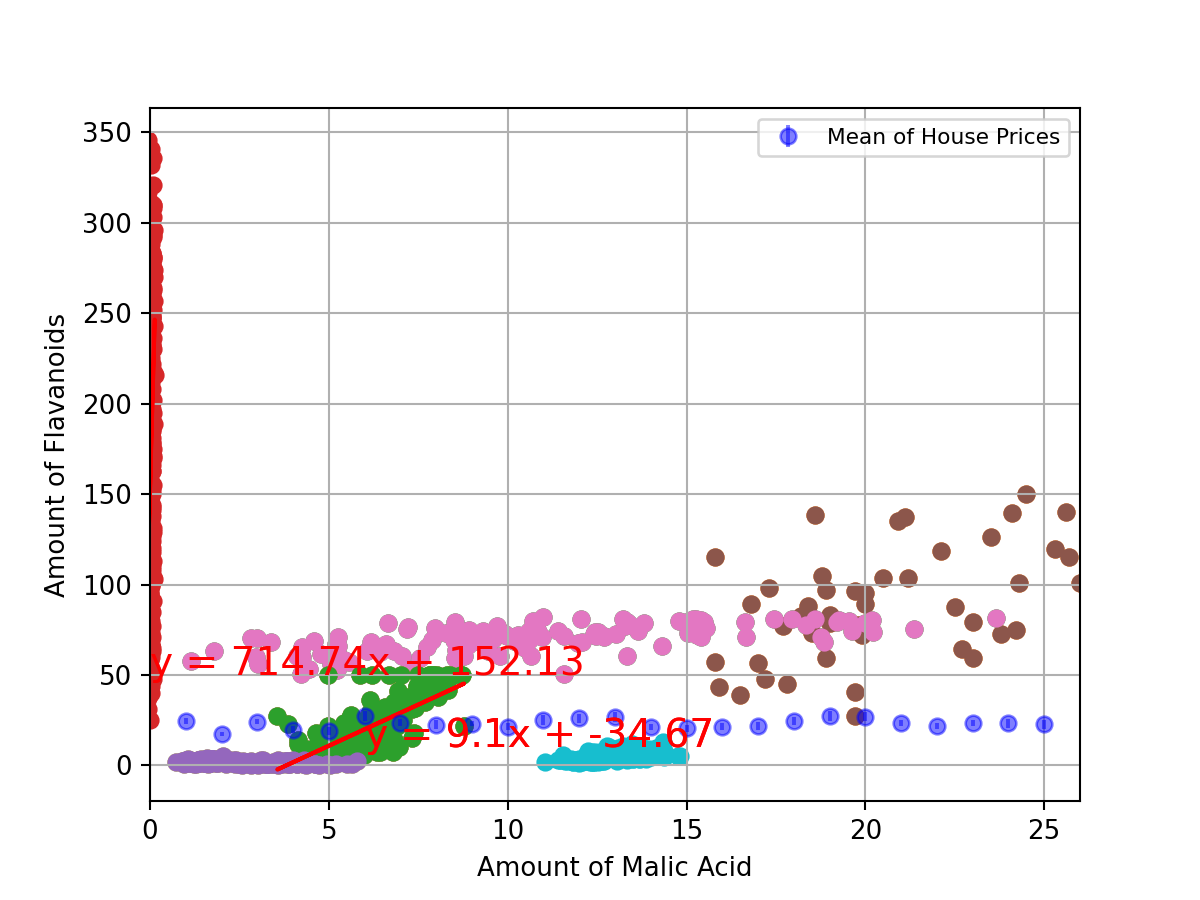

In [44]:
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(samples), 1)+1,means, yerr=sems, fmt="o", color="b",
            alpha=0.5, label="Mean of House Prices")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Median House Prices ($1000)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
plt.show()

In [45]:
# Calculate the range of SEM values
print(f"The range of SEM values in the sample set is {max(sems)-min(sems)}")

The range of SEM values in the sample set is 1.5559807261488328


In [46]:
# sems.sort()
sems

[1.7599043036184485,
 1.1886082086559095,
 1.5034044698616535,
 1.9699515756805586,
 2.1312956276949424,
 2.617315820695538,
 1.9231840375027198,
 2.5460898814084563,
 1.3575500378487555,
 1.8553961131904164,
 2.718264490829629,
 2.29212008273655,
 2.7445889348047423,
 1.8579201019589506,
 1.8373522138922453,
 1.9230085392699803,
 2.109058158465402,
 2.424982636942724,
 2.6410172980162496,
 2.4308161397487793,
 1.4610450477582637,
 1.7782975300166048,
 1.5130293766932759,
 2.3084102526927146,
 2.3483488040031784]

In [47]:
# Determine which sample's mean is closest to the population mean
print(f"The smallest SEM observed was {min(sems)}")
samp_index = sems.index(min(sems))
print(f"The sample with the smallest SEM is sample {samp_index+1}")

The smallest SEM observed was 1.1886082086559095
The sample with the smallest SEM is sample 2


In [48]:
# Compare to the population mean
print(f"The mean of the sample {samp_index+1} is {samples[samp_index].MEDV.mean()}")
print(f"The mean of the population data set is {housing_data.MEDV.mean()}")

The mean of the sample 2 is 17.4
The mean of the population data set is 22.532806324110698


# ==========================================

## Break (0:30)

# ==========================================

### 3.06 Instructor Do: Correlation Conundrum (15 min)

**Correlation** describes the question, `Is there a relationship between A and B?`

![correlations.png](../Images/correlations.png)

**Pearson's Correlation Coefficient**
In statistics, we quantify correlation using **Pearson’s r**.
* Pearson’s correlation coefficient describes the variability between two factors, denoted by the variable r.
* Pearson’s r is –1 ≤ r ≤ 1
  * –1 indicates perfect negative correlation.
  * 1 indicates perfect positive correlation.
  * 0 indicates no correlation.
* Real-world data is never perfect.

In [49]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [50]:
# Import the WHO dataset, drop missing data
who_data = pd.read_csv('06-Ins_Correlation_Conundrum/Resources/WDI_2018.csv')
who_data = who_data.dropna()
who_data.head()

,Country Name,Adjusted net national income per capita (current US$),Population (in thousands) total,Population Median Age,Percent Population over 65,Domestic general government health expenditure (% of general government expenditure),"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",People using at least basic drinking water services (% of population),Mobile cellular subscriptions (per 100 people),Mobile cellular subscriptions,"Immunization, measles (% of children ages 12-23 months)",Military expenditure (% of GDP)
0,Afghanistan,473.319371,37171.922,18.9,2.584927,1.798056,66.026,63.047,0.21,69.601931,59.120848,21976355.0,64.0,1.006746
1,Albania,4326.330596,2866.376,32.9,13.744742,9.709609,80.167,76.816,7.17,94.436391,94.176998,2714878.0,94.0,1.161266
2,Algeria,3219.975007,42228.415,28.1,6.362495,10.734436,77.938,75.494,0.95,94.037413,111.664792,47154264.0,80.0,5.467824
4,Angola,2000.546817,30809.787,15.9,2.216374,5.426737,63.666,58.064,6.94,56.591749,43.130519,13288421.0,50.0,1.871776
7,Armenia,3685.765957,2951.741,35.1,11.253833,5.269859,78.354,71.215,5.55,99.951924,121.259018,3579257.0,95.0,4.119886


In [51]:
# For the first example, determine which pairs of factors are correlated. 
plt.scatter(who_data.iloc[:,1],who_data.iloc[:,8])
plt.xlabel('Income Per Capita')
plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
plt.show()

In [52]:
plt.scatter(who_data.iloc[:,3],who_data.iloc[:,10])
plt.xlabel('Population Median Age')
plt.ylabel('Cell Phones Per 100 People')
plt.show()

In [53]:
plt.scatter(who_data.iloc[:,5],who_data.iloc[:,7])
plt.xlabel('% Government Expenditure on Health')
plt.ylabel('Male Life Expectancy')
plt.show()

In [54]:
plt.scatter(who_data.iloc[:,1],who_data.iloc[:,12])
plt.xlabel('Income Per Capita')
plt.ylabel('% Measles Immunization')
plt.show()

In [55]:
# The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"
income = who_data.iloc[:,1]
alcohol = who_data.iloc[:,8]
correlation = st.pearsonr(income,alcohol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.42


In [56]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(income,alcohol)
plt.xlabel('Income Per Capita')
plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.42


In [57]:
age = who_data.iloc[:,3]
cell_phones = who_data.iloc[:,10]
correlation = st.pearsonr(age,cell_phones)
plt.scatter(age,cell_phones)
plt.xlabel('Population Median Age')
plt.ylabel('Cell Phones Per 100 People')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.53


In [58]:
government = who_data.iloc[:,5]
life = who_data.iloc[:,7]
correlation = st.pearsonr(government,life)
plt.scatter(government,life)
plt.xlabel('% Government Expenditure on Health')
plt.ylabel('Male Life Expectancy')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.64


In [59]:
income = who_data.iloc[:,1]
measles = who_data.iloc[:,12]
correlation = st.pearsonr(income,measles)
plt.scatter(income,measles)
plt.xlabel('Income Per Capita')
plt.ylabel('% Measles Immunization')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()
correlation

The correlation between both factors is 0.34


(0.34498231095144055, 8.715746870154126e-05)

# ==========================================

### 3.07 Student Do: Correlation Conquerors (10 min)

## Instructions

* Execute the starter code to import the wine recognition dataset from scikit-learn.
* Using the dataset, plot the factors malic acid versus flavanoids on a scatter plot. Is this relationship positively correlated, negatively correlated, or not correlated? How strong is the correlation?
* Calculate the Pearson's correlation coefficient for  malic acid versus flavanoids. Compare the correlation coefficient to the Strength of Correlation table below. Was your prediction correct?

![correlation strength table](../Images/correlation_table.png)

* Plot the factors alcohol versus color intensity on a scatter plot. Is this relationship positively correlated, negatively correlated, or not correlated? How strong is the correlation?
* Calculate the Pearson's correlation coefficient for alcohol versus color intensity. Compare the correlation coefficient to the Strength of Correlation table. Was your prediction correct?

## Bonus

* Look at the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) to find how to generate a correlation matrix. This matrix will contain the Pearson's correlation coefficient for all pairs of factors in the DataFrame.
* Generate the correlation matrix and try to find the pair of factors that generate the strongest positive and strongest negative correlations.

In [78]:
# Dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt

In [79]:
# Read in the wine recognition data set from sklearn and load into Pandas
data = dta.load_wine()
wine_data = pd.DataFrame(data.data,columns=data.feature_names)
# wine_data
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [80]:
# Plot malic_acid versus flavanoids on a scatterplot
malic_acid = wine_data.malic_acid
flavanoids = wine_data.flavanoids
plt.scatter(malic_acid,flavanoids)
plt.xlabel("Amount of Malic Acid")
plt.ylabel("Amount of Flavanoids")
plt.show()

In [81]:
# Calculate the correlation coefficient between malic_acid and flavanoids
print(f"The correlation coefficient between malic acid and flavanoids is {round(st.pearsonr(malic_acid,flavanoids)[0],2)}")

The correlation coefficient between malic acid and flavanoids is -0.41


In [64]:
# Plot alcohol versus colour_intensity on a scatterplot
alcohol = wine_data.alcohol
color_intensity = wine_data.color_intensity
plt.scatter(alcohol,color_intensity)
plt.xlabel("Amount of Alcohol")
plt.ylabel("Intensity of Color")
plt.show()

In [65]:
# Calculate the correlation coefficient between alcohol and color_intensity
print(f"The correlation coefficient between alcohol and color intensity is {round(st.pearsonr(alcohol,color_intensity)[0],2)}")

The correlation coefficient between alcohol and color intensity is 0.55


In [66]:
# BONUS: Generate the correlation matrix and find the strongest positive and negative correlations
wine_corr = wine_data.corr()
display(wine_corr)
all_df = wine_corr.unstack().sort_values().to_frame()
all_df.head(25)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


,,0
malic_acid,hue,-0.561296
hue,malic_acid,-0.561296
nonflavanoid_phenols,flavanoids,-0.537900
flavanoids,nonflavanoid_phenols,-0.537900
hue,color_intensity,-0.521813
color_intensity,hue,-0.521813
od280/od315_of_diluted_wines,nonflavanoid_phenols,-0.503270
nonflavanoid_phenols,od280/od315_of_diluted_wines,-0.503270
total_phenols,nonflavanoid_phenols,-0.449935
nonflavanoid_phenols,total_phenols,-0.449935


# ==========================================

### 3.08 Instructor Do: Fits and Regression (10 min)

**Equation of a Straight Line**

* y = mx + b

* **m** is Slope or Gradient, **Slope** = Change in Y / Change in X |
* **Y Intercept** the value of **y** when **x** = 0

In [67]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [68]:
# This example compares different factors in the Boston housing data set
boston_data = datasets.load_boston()
housing_data = pd.DataFrame(data=boston_data.data,columns=boston_data.feature_names)
housing_data['MEDV'] = boston_data.target

In [69]:
# Plot out rooms versus median house price
x_values = housing_data['RM']
y_values = housing_data['MEDV']
plt.scatter(x_values,y_values)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

In [70]:
y_values

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [71]:
# Add the linear regression equation and line to plot
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

In [72]:
# Print out the r-squared value along with the plot.
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.6953599470715394


In [73]:
# The next example looks at a diabetes data set with less linear relationships
diabetes_data = datasets.load_diabetes()
data = pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)
data['1Y_Disease_Progress'] = diabetes_data.target

In [74]:
x_values = data['bp']
y_values = data['1Y_Disease_Progress']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Normalized Blood Pressure')
plt.ylabel('1Y_Disease_Progress')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.4414838489308861


# ==========================================

### 3.09 Student Do: Fits and Regression (15 min)

## Instructions

* Execute the starter code. This starter code will import the dependencies you will need as well as load the FBI CIUS (Crime in the United States 20*) dataset.
* Generate a scatter plot with Matplotlib using the year as the independent (*x*) variable and the violent crime rate as the dependent (*y*) variable.
* Use `stats.linregress` to perform a linear regression with the year as the independent variable (*x*) and the violent crime rate as the dependent variable (*y*).
* Use the information returned by `stats.linregress` to create the equation of a line from the model.
* Calculate the predicted violent crime rate of the linear model using the year as the *x* values.
* Plot the linear model of year versus violent crime rate on top of your scatter plot.
  * **Hint**: Your scatter plot and line plot share the same axis.
  * **Hint**: In order to overlay plots in a notebook, the plots must be in the same code block.
* Repeat the process of generating a scatter plot, calculating the linear regression model, and plotting the regression line over the scatter plot for the following pairs of variables:
  * Year versus murder rate.
  * Year versus aggravated assault.

## Bonus
* Use `pyplot.subplots` from Matplotlib to create a new figure that displays all three pairs of variables on the same plot. For each pair of variables, there should be a scatter plot and a regression line.
  * **Hint**: All three plots share the same x-axis.
* Use the regression lines you created to predict what the violent crime rate, murder rate, and assault rate will be in 20*.

## Hints

* See the documentation for [stats.linregress](https://docs.scipy.org/doc/scipy-0.*.0/reference/generated/scipy.stats.linregress.html).
* Recall that `stats.linregress` returns a slope, called *m*,, and a *y*-intercept, called *b*. These let you define a line for each fit by simply writing: `y-values = m * x-values + b`, for each linear regression you perform.

In [75]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [77]:
# Load crime data set into pandas
crime_data = pd.read_csv("09-Stu_Fits_and_Regression/Resources/singapore-motor-vehicle-population.csv")
crime_data.head()

,year,type,engine,number
0,2006,Cars,Petrol,471707
1,2006,Cars,Diesel,7
2,2006,Cars,Petrol-Electric,379
3,2006,Cars,Petrol-Electric (Plug-In),0
4,2006,Cars,Petrol-CNG,214


In [ ]:
# Generate a scatter plot of year versus violent crime rate
year = crime_data.iloc[:,0]
violent_crime_rate = crime_data.iloc[:,3]
plt.scatter(year,violent_crime_rate)
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.show()

In [ ]:
# Perform a linear regression on year versus violent crime rate
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, violent_crime_rate)

In [ ]:
# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * year + vc_int
vc_fit

In [ ]:
# Plot the linear model on top of scatter plot 
year = crime_data.iloc[:,0]
violent_crime_rate = crime_data.iloc[:,3]
plt.scatter(year,violent_crime_rate)
plt.plot(year,vc_fit,"--", color="red")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.show()

In [ ]:
# Repeat plotting scatter and linear model for year versus murder rate
murder_rate = crime_data.iloc[:, 5]
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(year, murder_rate)
m_fit = m_slope * year + m_int
plt.scatter(year,murder_rate)
plt.plot(year,m_fit,"--", color="red")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Murder Rate')
plt.show()

In [ ]:
# Repeat plotting scatter and linear model for year versus aggravated assault
aggravated_assault_rate = crime_data.iloc[:, 9]
aa_slope, aa_int, aa_r, aa_p, aa_std_err = stats.linregress(
    year, aggravated_assault_rate)
aa_fit = aa_slope * year + aa_int
plt.scatter(year,aggravated_assault_rate)
plt.plot(year,aa_fit,"--", color="red")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Aggravated Assault Rate')
plt.show()

In [ ]:
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(year), max(year))
ax1.plot(year, violent_crime_rate, linewidth=1, marker="o")
ax1.plot(year, vc_fit, "b--", linewidth=1)
ax1.set_ylabel("Violent Crime Rate")

ax2.plot(year, murder_rate, linewidth=1, marker="o", color="r")
ax2.plot(year, m_fit, "r--", linewidth=1)
ax2.set_ylabel("Murder Rate")

ax3.plot(year, aggravated_assault_rate, linewidth=1, marker="o", color="g")
ax3.plot(year, aa_fit, "g--", linewidth=1)
ax3.set_ylabel("Aggravated Assault Rate")
ax3.set_xlabel("Year")

plt.show()

In [ ]:
# aa_slope, aa_int, aa_r, aa_p, aa_std_err
# m_slope, m_int, m_r, m_p, m_std_err Murder

# y = aa_slope * x + aa_int
y = (2019 * aa_slope) + aa_int
print(y)
Murders = (2019 * m_slope) + m_int
print("Murders in 2019 will be appro: ", Murders)

In [ ]:
# Calculate the crime rates for 2019
year = 2019
print(f"The violent crime rate in 2019 will be {round(vc_slope * year + vc_int,2)}.")
print(f"The murder rate in 2019 will be {round(m_slope * year + m_int,2)}.")
print(f"The aggravated assault rate in 2019 will be {round(aa_slope * year + aa_int,2)}.")

# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "05-Matplotlib - Day 3 - Introduction to Statistics"
objectives = [
    "Calculate summary statistics such as mean, median, mode, variance and standard deviation using Python",
    "Plot, characterize, and quantify a normally distributed dataset using Python",
    "Qualitatively and quantitatively identify potential outliers in a dataset",
    "Differentiate between a sample and a population in regards to a dataset",
    "Define and quantify correlation between two factors",
    "Calculate and plot a linear regression in Python",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))